In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sequencing_tools.viz_tools import color_encoder, okabeito_palette
import re
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

def label_sample(x):
    if 'HS' in x:
        return 'High salt'
    elif 'Frag' in x:
        return 'Fragmented'
    elif re.search('N[aA]', x):
        return 'Alkaline hydrolysis'
    elif re.search('L[12]',x):
        return 'PolyA-selected'
    elif re.search('Exo|ED|DE', x):
        return 'Exonuclease I'
    elif 'All' in x:
        return 'Untreated'
    elif re.search('IGG|S9', x):
        return 'Pull down'
    else:
        return 'Unfragmented'

In [26]:
tablename = '/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map/picard_qc/clip_table.tsv'
df = pd.read_table(tablename) \
    .assign(base_fraction = lambda d: d.clipped_bases / d.bases * 100)\
    .assign(clip_aln = lambda d: d.softclip_count / d.aln_count * 100) \
    .assign(prep = lambda d: d.samplename.map(label_sample))
prep_encoder = color_encoder()
prep_encoder.fit(df.prep, okabeito_palette())
df.head()

,samplename,aln_count,softclip_count,bases,clipped_bases,base_fraction,clip_aln,prep
0,QCF1_R1_001,624174,338342,37076957,774804,2.089718,54.206359,Unfragmented
1,Qcf6_SS_R1_001,604747,308845,36362702,687154,1.889722,51.070117,Unfragmented
2,Qcf_Na1_R1_001,13530214,4347483,863254776,7747071,0.897426,32.131665,Alkaline hydrolysis
3,Qcf_Exo1_R1_001,1583315,708869,91395358,1466290,1.604337,44.771192,Exonuclease I
4,Qcf4_R1_001,559118,301350,34272214,694551,2.026572,53.897388,Unfragmented


In [30]:
df.filter(regex= 'samplename|prep|base_fraction').sort_values('samplename')口

,samplename,base_fraction,prep
0,QCF1_R1_001,2.089718,Unfragmented
17,QCF2_R1_001,2.169041,Unfragmented
14,Qcf10_R1_001,1.762145,Unfragmented
4,Qcf4_R1_001,2.026572,Unfragmented
19,Qcf5_R1_001,1.981454,Unfragmented
1,Qcf6_SS_R1_001,1.889722,Unfragmented
15,Qcf7_R1_001,2.060346,Unfragmented
18,Qcf8_R1_001,1.976360,Unfragmented
6,Qcf9_R1_001,1.941974,Unfragmented
5,Qcf_All1_R1_001,0.979428,Untreated


In [11]:
def plot_fraction(df, col, ax):
    df = df.sort_values(col)
    order_prep = df.prep.unique()
    sns.swarmplot(data = df, 
              x = 'prep', 
              y = col, 
              order = order_prep,
              ax = ax,
              palette = [prep_encoder.encoder[p] for p in order_prep])
    xt = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

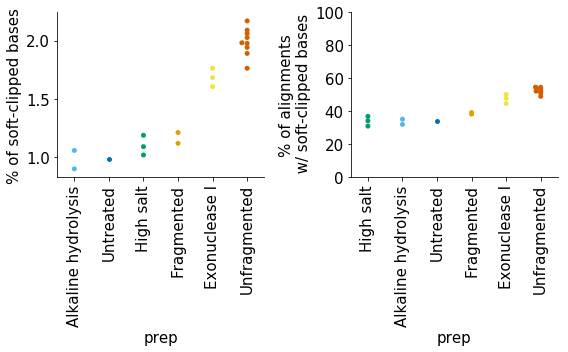

In [12]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(121)
plot_fraction(df, 'base_fraction' ,ax)
ax.set_ylabel('% of soft-clipped bases')

ax = fig.add_subplot(122)
plot_fraction(df,'clip_aln', ax)
ax.set_ylim(0,100)
ax.set_ylabel('% of alignments\n w/ soft-clipped bases')
fig.tight_layout()
sns.despine()

In [13]:
stat_table = '/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map/map_stat.csv'
df = pd.read_csv(stat_table) \
    .assign(total_mapping_rate = lambda d: (d['HISAT mapped pairs'] + d['BOWTIE2 mapped pairs'] + \
                                            d['tRNA/rRNA/YRNA pairs'])/d['Trimmed pairs']) \
    .assign(mapping_rate = lambda d: (d['HISAT mapped pairs'] + d['BOWTIE2 mapped pairs'])/d['non tRNA/rRNA/YRNA pairs'])\
    .assign(label = lambda d: d['Sample name'].map(label_sample))
df

,Sample name,Raw pairs,Trimmed pairs,tRNA/rRNA/YRNA pairs,non tRNA/rRNA/YRNA pairs,HISAT mapped pairs,HISAT uniquely mapped,BOWTIE2 mapped pairs,BOWTIE2 uniquely mapped,total_mapping_rate,mapping_rate,label
0,IGG-cf,4300050,1294549,14053.0,1280496,582631.0,580645,50454.0,29775,0.499895,0.494406,Pull down
1,QCF1,17454019,15576850,10384977.0,5191873,1107004.0,612993,280216.0,145607,0.755750,0.267191,Unfragmented
2,QCF2,22734479,21409484,14369745.0,7039739,1390662.0,812802,397601.0,209020,0.754713,0.254024,Unfragmented
3,Qcf10,14321566,12854786,11063610.0,1791176,438786.0,341476,181908.0,93720,0.908946,0.346529,Unfragmented
4,Qcf4,12209553,10301656,7999866.0,2301790,490530.0,333651,232862.0,109942,0.846782,0.314274,Unfragmented
5,Qcf5,9835292,6963814,5324524.0,1639290,328588.0,229931,168396.0,78938,0.835965,0.303170,Unfragmented
6,Qcf6_SS,10798548,8974735,7023331.0,1951404,454300.0,345256,187592.0,93700,0.854089,0.328939,Unfragmented
7,Qcf7,13188083,11784043,9519478.0,2264565,582853.0,361608,314348.0,147650,0.883965,0.396191,Unfragmented
8,Qcf8,12428429,10884001,9303933.0,1580068,352787.0,248781,167336.0,85133,0.902614,0.329178,Unfragmented
9,Qcf9,11572310,10343710,8617015.0,1726695,342198.0,241052,166505.0,84128,0.882248,0.294611,Unfragmented


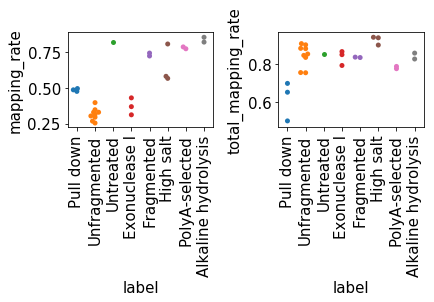

In [18]:
def plot_mapping(df, variable, ax):
    sns.swarmplot(data = df, 
                  x = 'label', 
                  y = variable,ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)



ax = plt.subplot(121)
plot_mapping(df, 'mapping_rate', ax)
ax = plt.subplot(122)
plot_mapping(df, 'total_mapping_rate', ax)
plt.tight_layout()

Text(0,0.5,'Mapping rate')

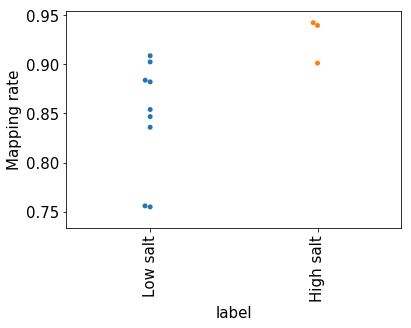

In [24]:
ax = plt.subplot(111)
subdf = df.pipe(lambda d: d[d['label'].str.contains('High|Unf')])
plot_mapping(subdf, 'total_mapping_rate', ax)
ax.set_xticklabels(['Low salt', 'High salt'])
ax.set_ylabel('Mapping rate')